# More Examples

## Statistical Testing Examples in Python

### Chi2

In [28]:
%matplotlib inline
import pandas as pd
from scipy import stats
from pydataset import data
import viz
#visualize
import matplotlib.pyplot as plt
import seaborn as sns

tips = data('tips')


In [3]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
tips.shape

(244, 7)

In [5]:
# use chi squared to compare two categorical variables 
# compare sex with smoker

In [6]:
# state hypothesis and define alpha or level of significance

 - $H_0$: Sex is independent of whether or not someone is a smoker
 - $H_a$: Sex is dependent of whether or not someone is a smoker

In [7]:
alpha = 0.05

In [8]:
# create contingency table
contingency_table = pd.crosstab(tips.sex, tips.smoker)
contingency_table

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [9]:
# we have a crosstab so use chi2_contingency test

stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]]))

In [10]:
# you can create variables of the output(chi2 statistics, pvalue, degrees of freedom, and matrix of expected values)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


In [11]:
# pretty print output values so we can easily read them
print('Observed')
print(contingency_table.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[54 33]
 [97 60]]

Expected
[[53 33]
 [97 59]]

----
chi^2 = 0.0000
p     = 1.0000


In [12]:
# Conclusion based on output variables
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


In [13]:
# we fail to reject the null hypothesis
# Sex is independent of whether or not someone is a smoker

### pearson r

In [14]:
# pearson r test to comapre two continuous vairables and see if they are linearly correlated 
# and we can see the strenght of the correlation (total bill and tip)

In [15]:
# state hypothesis and define alpha or level of significance

 - $H_0$: There is no linear correlation between the total bill and the tip amount
 - $H_a$: There is a linear correlation between the total bill and the tip amount

In [16]:
alpha = 0.05

In [19]:
# pass series of the data into the pearson r test from scipy's stats module
# test statistics is the r value, and the p value is the p value
stats.pearsonr(tips.total_bill, tips.tip)

PearsonRResult(statistic=0.6757341092113641, pvalue=6.692470646864281e-34)

In [22]:
# you can assign variables to use in a pretty print
r, p = stats.pearsonr(tips.total_bill, tips.tip)

In [24]:
# print so variables are easy to read
# print test results to easily read
r , p = stats.pearsonr(tips.total_bill, tips.tip)
print(r)
print(f'p     = {p:.4f}')

0.6757341092113641
p     = 0.0000


In [25]:
#evaluate p-value
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# there is a relationship between total bill and tip amount

In [ ]:
#r value tells us how strongly the two vairables are correlated and if its postive or negative
# -1 maps like (\), 0 like (-),  and 1 maps as (/) on a scatter plot
# for example, the r value of .6 is postive so we get a postive correlation, and its close to 1 
# so the points will be close to eachother.

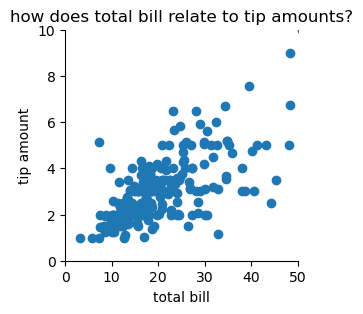

In [37]:
# Visualize
plt.figure(figsize=(3,3))

plt.scatter(tips.total_bill, tips.tip)                  

plt.title('how does total bill relate to tip amounts?')
plt.xlabel('total bill') #first value sent into scatter
plt.ylabel('tip amount') #second value sent into scatter
plt.xlim(0, 50)
plt.ylim(0, 10)
plt.show()

### t-test